# Challenge - Fashion

![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Lauren Fleischmann](https://unsplash.com/photos/R2aodqJn3b8)

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [151]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [198]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

In [199]:
X_train.shape

(60000, 28, 28)

In [200]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [201]:
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

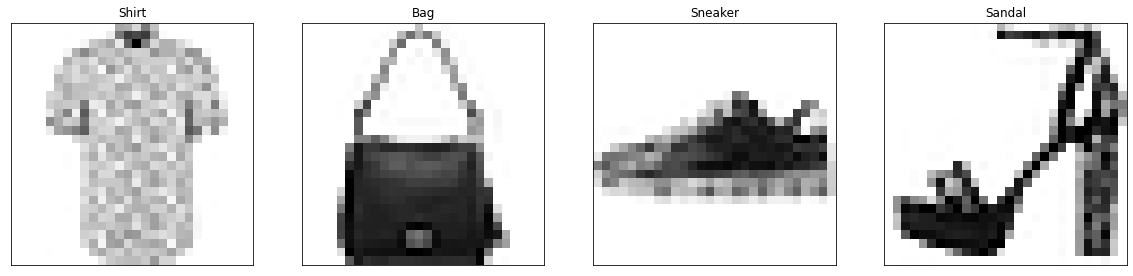

In [202]:
# TODO: Explore the data, display some input images

size = 4
sample_graph = np.random.randint(0,60000, size)

sample_images = X_train[sample_graph]
sample_labels = y_train[sample_graph]

plt.figure(figsize = (20,10))

ax =[]

for i in range(1,size+1):
    ax.append(plt.subplot(size // 4 + 1,4,i))
    plt.imshow(sample_images[i-1].reshape((28,28)), cmap='gray_r')
    ax[i-1].title.set_text(labels_map[sample_labels[i-1]])
    ax[i-1].set_xticks([])
    ax[i-1].set_yticks([])

plt.show()

**Before going further**: what methods could you use to perform such a classification task?

I could use any classification model (KNN, LogisticRegression, Trees, Forests,...)

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [203]:
# TODO: Make the data preparation
X_train_rs = X_train.reshape(X_train.shape[0], -1) / 255
X_test_rs = X_test.reshape(X_test.shape[0], -1) / 255

In [204]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [205]:
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [206]:
# TODO: Build your model
def multilayer_perceptron(input_dim):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(50, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [207]:
# TODO: Compile and fit your model
model = multilayer_perceptron(784)

In [208]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [213]:
model.fit(X_train_rs, y_train_cat, epochs=50, batch_size=500, validation_data=(X_test_rs, y_test_cat))

Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8579 - val_loss: 0.4429 - val_accuracy: 0.8414
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8569 - val_loss: 0.4434 - val_accuracy: 0.8420
Epoch 3/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8580 - val_loss: 0.4520 - val_accuracy: 0.8386
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8580 - val_loss: 0.4451 - val_accuracy: 0.8435
Epoch 5/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8589 - val_loss: 0.4404 - val_accuracy: 0.8426
Epoch 6/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8585 - val_loss: 0.4395 - val_accuracy: 0.8446
Epoch 7/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8593 - val_loss: 0.4432 - val_accuracy: 0.8418
Epoch 

In [214]:
loss_test, test_acc = model.evaluate(X_test_rs, y_test_cat)
loss_train, train_acc = model.evaluate(X_train_rs, y_train_cat)

print('Test accuracy: ', test_acc)
print('Train accuracy: ', train_acc)

1875/1875 [==============================] - 2s 980us/step - loss: 0.3525 - accuracy: 0.8757
Test accuracy:  0.8567000031471252
Train accuracy:  0.8756833076477051


Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [ ]:
# TODO: Compute the accuracy of your model

What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you will perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [ ]:
# TODO: Redo the classification with PCA and classification model

In [194]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_rs)
X_test_pca = pca.transform(X_test_rs)

In [195]:
pca.n_components_

187

In [217]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [220]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_pca, y_train)

SVC()

In [221]:
svc.score(X_test_pca, y_test)

0.886

Did the neural network improve significantly the performances? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.

In [222]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('pca', PCA()),('estimator', SVC())])

In [223]:
param_grid = {'pca__n_components':[100, 200, 300],
             'estimator__C': [0.01, 1, 10, 100],
             'estimator__gamma': ['auto', 'scale']}

In [225]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid)

In [ ]:
grid.fit(X_train_rs, y_train)

In [ ]:
grid.best_params_